Group 5: LI LINGYU, LIU YICHAO, WU JINGYAN, YANG QINGSHAN, YE FANGDA

> created: 2025-01-16T12:46:52 (UTC +08:00)    
> source: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data

# Crimes - 2001 to Present | City of Chicago | Data Portal

## Excerpt

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. Should you have questions about this dataset, you may contact the Data Fulfillment and Analysis Division of the Chicago Police Department at [DFA@ChicagoPolice.org](mailto:DFA@ChicagoPolice.org). Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information and the information should not be used for comparison purposes over time. The Chicago Police Department will not be responsible for any error or omission, or for the use of, or the results obtained from the use of this information. All data visualizations on maps should be considered approximate and attempts to derive specific addresses are strictly prohibited. The Chicago Police Department is not responsible for the content of any off-site pages that are referenced by or that reference this web page other than an official City of Chicago or Chicago Police Department web page. The user specifically acknowledges that the Chicago Police Department is not responsible for any defamatory, offensive, misleading, or illegal conduct of other users, links, or third parties and that the risk of injury from the foregoing rests entirely with the user. The unauthorized use of the words "Chicago Police Department," "Chicago Police," or any colorable imitation of these words or the unauthorized use of the Chicago Police Department logo is unlawful. This web page does not, in any way, authorize such use. Data are updated daily. To access a list of Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) codes, go to [http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e](http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e)


## Columns (22)
| Column Name           | Description                                                                                                                                                 | API Field Name      | Data Type         |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------|-------------------|
| ID                   | Unique identifier for the record.                                                                                                                           | id                  | Number            |
| Case Number          | The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.                                                         | case_number         | Text              |
| Date                 | Date when the incident occurred. This is sometimes a best estimate.                                                                                         | date                | Floating Timestamp|
| Block                | The partially redacted address where the incident occurred, placing it on the same block as the actual address.                                              | block               | Text              |
| IUCR                 | The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description.                                                     | iucr                | Text              |
| Primary Type         | The primary description of the IUCR code.                                                                                                                   | primary_type        | Text              |
| Description          | The secondary description of the IUCR code, a subcategory of the primary description.                                                                       | description         | Text              |
| Location Description | Description of the location where the incident occurred.                                                                                                    | location_description| Text              |
| Arrest               | Indicates whether an arrest was made.                                                                                                                       | arrest              | Checkbox          |
| Domestic             | Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.                                                       | domestic            | Checkbox          |
| Beat                 | Indicates the beat where the incident occurred. A beat is the smallest police geographic area.                                                              | beat                | Text              |
| District             | Indicates the police district where the incident occurred.                                                                                                  | district            | Text              |
| Ward                 | The ward (City Council district) where the incident occurred.                                                                                               | ward                | Number            |
| Community Area       | Indicates the community area where the incident occurred. Chicago has 77 community areas.                                                                   | community_area      | Text              |
| FBI Code             | Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).                                               | fbi_code            | Text              |
| X Coordinate         | The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.                                               | x_coordinate        | Number            |
| Y Coordinate         | The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.                                               | y_coordinate        | Number            |
| Year                 | Year the incident occurred.                                                                                                                                 | year                | Number            |
| Updated On           | Date and time the record was last updated.                                                                                                                  | updated_on          | Floating Timestamp|
| Latitude             | The latitude of the location where the incident occurred.                                                                                                   | latitude            | Number            |
| Longitude            | The longitude of the location where the incident occurred.                                                                                                  | longitude           | Number            |
| Location             | The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal.                   | location            | Location          |

## Tableau Exploratory Data Analysis Workbook
Google drive link: https://drive.google.com/file/d/1r96RIkpor7FvESTboG7uQf5M_FjkcTXL/view?usp=sharing

Data in Google Drive: https://drive.google.com/file/d/1xfKuDucVRQXXQr9-EN6y_fiTksoGoiNM/view?usp=sharing

# Read Data

In [89]:
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter

In [90]:
# Load data using pandas
chicago = pd.read_csv(config.TRAIN_FILE)
chicago.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
4,13204489,JG416325,09/06/2023 11:00:00 AM,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,4.0,32.0,06,1176857.0,1896680.0,2023,11/04/2023 03:40:18 PM,41.871835,-87.626151,"(41.871834768, -87.62615082)"


# Visualization

In [91]:
# show info about IUCR column and Primary Type
if config.VISUALIZATION:
    chicago['Primary Type'].unique()
    crime_counts = chicago.groupby('Primary Type').size().reset_index(name='count')
    crime_counts = crime_counts.sort_values('count', ascending=False)

    # visualize crime type distribution, use log scale because the ratio is too large
    plt.figure(figsize=(15, 8))
    plt.bar(crime_counts["Primary Type"], crime_counts["count"])
    plt.yscale('log')
    plt.title('Distribution of Crime Types in Chicago (2012-2017)', pad=20)
    plt.xlabel('Crime Type')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()
    print("\nCrime counts by type:")
    print(crime_counts)


In [92]:
# show crime location distribution on a reral chicago map
if config.VISUALIZATION:
    import folium
    from folium import plugins

    # Create a base map centered on Chicago
    chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

    # Create a list of locations from the dataframe
    locations = chicago_clean[["Latitude", "Longitude"]].values.tolist()

    # Add a heatmap layer with customized parameters
    plugins.HeatMap(
        locations,
        min_opacity=0.2,
        radius=15,
        blur=10,
        gradient={
            '0.2': '#fee0d2',
            '0.4': '#fc9272',
            '0.6': '#de2d26',
            '1.0': '#a50f15'
        }
    ).add_to(chicago_map)

    # Add a marker cluster layer for individual crime points
    marker_cluster = plugins.MarkerCluster().add_to(chicago_map)

    # Sample a subset of crimes to avoid overwhelming the map
    sample_size = 1000
    sampled_crimes = chicago_clean.sample(n=sample_size, random_state=config.SEED)

    # Add markers for each crime in the sample
    for _, row in sampled_crimes[["Latitude", "Longitude", "Primary Type", "Date"]].iterrows():
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"Type: {row['Primary Type']}<br>Date: {row['Date']}",
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(marker_cluster)

    # Display the map 
    # chicago_map # uncomment to display the map (dont commit the map to git)

# Handle Missing Value

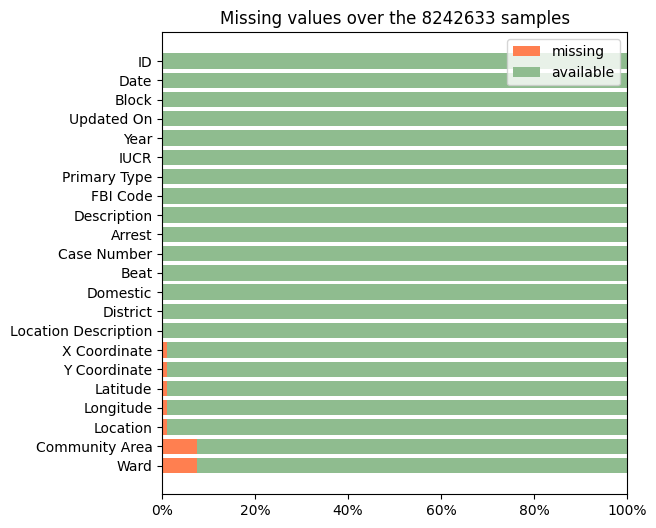

In [93]:
# Data cleaning for missing value
# we can 
# 1. drop missling value (since missing value ratio is low, and data is large -> so we drop them)
# 2. fill in missing value with our own assumption 
# 3. train the model with existing value to predict missing value (for large missing value ratio, not applicable here)

# calculate missing value ratio
missing_count = chicago.isnull().sum().reset_index()
missing_count.columns = ['feature', 'null_count']
missing_count = missing_count.sort_values('null_count', ascending=False)
missing_count['null_ratio'] = missing_count['null_count'] / len(chicago)

plt.figure(figsize=(6, 6))
plt.title(f'Missing values over the {len(chicago)} samples')
plt.barh(np.arange(len(missing_count)), missing_count['null_ratio'], color='coral', label='missing')
plt.barh(np.arange(len(missing_count)), 
         1 - missing_count['null_ratio'],
         left=missing_count['null_ratio'],
         color='darkseagreen', label='available')
plt.yticks(np.arange(len(missing_count)), missing_count['feature'])
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.xlim(0, 1)
plt.legend()
plt.show()

In [94]:
# print missing_count, some features have very less missing values that we cannot see them in the plot
chicago.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13890
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614829
Community Area          613455
FBI Code                     0
X Coordinate             91263
Y Coordinate             91263
Year                         0
Updated On                   0
Latitude                 91263
Longitude                91263
Location                 91263
dtype: int64

In [95]:
# Handle missing values by dropping rows with missing values
chicago_clean = chicago.copy()
coordinate_cols = ["X Coordinate", "Y Coordinate", "Latitude", "Longitude",\
                    "Location", "Ward", "Community Area", "District", "Location Description"]
chicago_clean = chicago_clean.dropna(subset=coordinate_cols, how='any')

In [96]:
# Check if there are any missing values left
chicago_clean.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

# Clean Duplication

In [97]:
# Check the unique value of case number and ID
id_duplicates = chicago_clean[chicago_clean['ID'].duplicated()]
case_duplicates = chicago_clean[chicago_clean['Case Number'].duplicated()]
print(f"Duplicate Case Numbers: {len(case_duplicates)}")

Duplicate Case Numbers: 571


In [98]:
# Drop duplicates
chicago_clean = chicago_clean.drop_duplicates(subset=['Case Number', 'ID'])
print(f"Duplicate Case Numbers: {len(case_duplicates)}")
print(f"Duplicate IDs: {len(id_duplicates)}")

# Drop id and case number since they are not useful for prediction
chicago_clean = chicago_clean.drop(columns=['ID', 'Case Number'])

Duplicate Case Numbers: 571
Duplicate IDs: 0


In [99]:
# Drop useless columns - contain useless or duplicate information
# Use coordinate is enough
chicago_clean = chicago_clean.drop(['Updated On', 'Location', 'X Coordinate', 'Y Coordinate'], axis=1)
# Primary Type is same as FBI Code and IUCR, and Description is also useless if we want to predict policing only
chicago_clean = chicago_clean.drop(['IUCR', 'FBI Code', 'Description'], axis=1)

# Block, the most specific location -> when we predict, we dont predict for a specific block usually, we will do on a larger region
# Location Description is also to specific
# Beat is the smallest police patrol area
# District composed of multiple beats, typically with a polcice station responsible for it
# Ward if a city council district, have no direct hierarchial relationship with Beat or District
# Community Area, one of the 77 community areas in Chicago, no relationship with Wards, Beats, or Districts

# we goona use coordinate to split the data into different grids
# the spatial relationship can be stored in the grid x-y
# and remove specific Beat/District/Ward/CA also can make model more generalizable
chicago_clean = chicago_clean.drop(['Block','Location Description', 'Beat', 'District', 'Ward', 'Community Area'], axis=1)

# Domestic is also useless at this stage unless we want to specificly predict domestic crime
chicago_clean = chicago_clean.drop(['Domestic'], axis=1)

# Remove Spatial Outliers

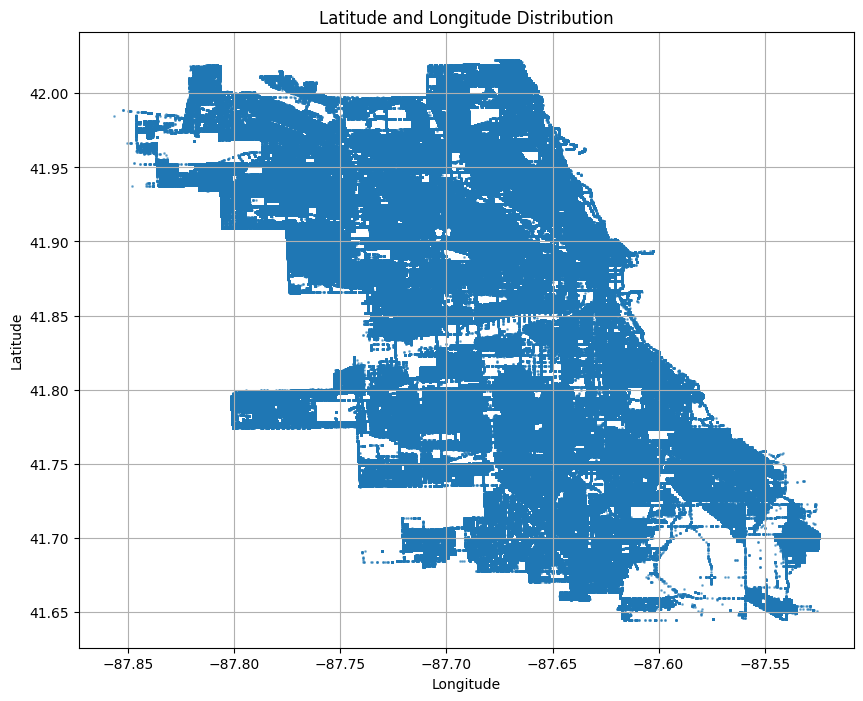

In [106]:
# Process Spatial Outliers
lon_99_percentile = chicago_clean['Longitude'].quantile(0.99)
lon_01_percentile = chicago_clean['Longitude'].quantile(0.01)
lon_std = chicago_clean['Longitude'].std()
lat_99_percentile = chicago_clean['Latitude'].quantile(0.99)
lat_01_percentile = chicago_clean['Latitude'].quantile(0.01)
lat_std = chicago_clean['Latitude'].std()

chicago_clean = chicago_clean[
    (chicago_clean['Longitude'] <= lon_99_percentile + lon_std) &
    (chicago_clean['Longitude'] >= lon_01_percentile - lon_std) &
    (chicago_clean['Latitude'] <= lat_99_percentile + lat_std) &
    (chicago_clean['Latitude'] >= lat_01_percentile - lat_std)
]

plt.figure(figsize=(10, 8))
plt.scatter(chicago_clean['Longitude'], chicago_clean['Latitude'], s=1, alpha=0.5)
plt.title('Latitude and Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Temporal and Spatial Aggregation

In [100]:
# Temproal Aggregation


In [102]:
chicago_clean

,Date,Primary Type,Arrest,Year,Latitude,Longitude
3,09/06/2023 05:00:00 PM,CRIMINAL DAMAGE,False,2023,41.886018,-87.633938
4,09/06/2023 11:00:00 AM,THEFT,False,2023,41.871835,-87.626151
5,05/21/2019 08:20:00 AM,BURGLARY,False,2019,41.856547,-87.695605
6,07/07/2021 10:30:00 AM,SEX OFFENSE,False,2021,41.655116,-87.594883
7,06/14/2022 02:47:00 PM,ROBBERY,True,2022,41.945232,-87.766735
...,...,...,...,...,...,...
8242627,01/12/2025 12:01:00 AM,THEFT,False,2025,41.846246,-87.628139
8242629,01/13/2025 03:20:00 PM,BATTERY,False,2025,41.940185,-87.734607
8242630,01/13/2025 07:30:00 PM,THEFT,False,2025,41.928528,-87.704880
8242631,01/13/2025 05:00:00 PM,THEFT,False,2025,41.883475,-87.627877


# Save Cleaned Data

In [103]:
# Save cleaned data to csv file
#chicago_clean.to_csv(config.TRAIN_FILE_CLEAN, index=False)